In [1]:
import os

import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from keras.preprocessing import image 
from keras.preprocessing.image import img_to_array
import cv2
from PIL import Image , ImageOps
import h5py

#import tensorflow_datasets as tfds
#tfds.disable_progress_bar()

In [2]:
# read the input image using Pillow (you can use another library, e.g., OpenCV)
#img1= Image.open("E:/CS/Graduation Project/-A-learning-based-semi-Humanoid-Robot-for-On-campus-Surveillance-main/Integrated/dataset/testing_data/IMG_2385_JPG.rf.1576ffdad0c476433bd6d5de457d8c35.jpg")
#img2= Image.open("E:/CS/Graduation Project/-A-learning-based-semi-Humanoid-Robot-for-On-campus-Surveillance-main/Integrated/dataset/validation_data/smoking/smoking_0107.jpg")

In [3]:

#path="E:/CS/Graduation Project/-A-learning-based-semi-Humanoid-Robot-for-On-campus-Surveillance-main/Integrated/dataset/validation_data/smoking/smoking_0106.jpg"

In [4]:
#h5py.run_tests()

In [5]:
#image = cv2.imread('C:/Users/N/Desktop/Test.jpg')
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [2]:
loaded_model = tf.keras.models.load_model("E:/CS/Graduation Project/-A-learning-based-semi-Humanoid-Robot-for-On-campus-Surveillance-main/Integrated/BigModels.h5")
loaded_model.layers[0].input_shape 

(None, 100, 100, 1)

In [19]:
image_path="E:/CS/Graduation Project/-A-learning-based-semi-Humanoid-Robot-for-On-campus-Surveillance-main/Integrated/dataset_Copy/validation_data/Normal/notsmoking_0179.jpg"

In [20]:

# dataset/validation_data/fighting/frame4015.jpg"
#gray = cv2.cvtColor(image_path, cv2.COLOR_BGR2GRAY)
#img=tf.keras.preprocessing.image.load_img(image_path,grayscale=True )#target_size=(160, 160)

img = image.load_img(image_path, grayscale=False,target_size=(100, 100))

# imgGray = img.convert('L')
#img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)


#image=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#print(img.shape)
#print(type(img))
#image=cv2.resize(image,(112,112))
#gray=ImageOps.grayscale(img).resize((112,112))

width = 100
height = 100
#print(image.shape)
#gray=ImageOps.grayscale(img)

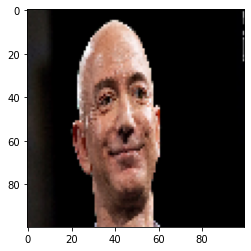

[6.86047776e-25 9.60697830e-01 1.08649235e-13 3.93021554e-02]
Normal


In [21]:
imgplot = plt.imshow(img)
plt.show()

img = image.load_img(image_path, grayscale=True,target_size=(100, 100))

img_array = img_to_array(img)
img = np.expand_dims(img_array, axis=0)
result= loaded_model.predict(img)
    
print(result[0])
if result[0][0]> result[0][1] and result[0][0]> result[0][2] and result[0][0]> result[0][3] :
    print ("Fight")
elif result[0][1]> result[0][0] and result[0][1]> result[0][2] and result[0][1]> result[0][3] :
    print("Normal")
elif result[0][2]> result[0][1] and result[0][2]> result[0][0] and result[0][2]> result[0][3] :
    print ("Playing-Cards")
elif result[0][3]> result[0][1] and result[0][3]> result[0][2] and result[0][3]> result[0][0] :
    print("Smoking")
# class_probabilities = loaded_model.predict_proba(img)
# print(class_probabilities)

In [26]:
print(result[0])
if result[0][0]> result[0][1] and result[0][0]> result[0][2] and result[0][0]> result[0][3] :
    print ("Fight")
elif result[0][1]> result[0][0] and result[0][1]> result[0][2] and result[0][1]> result[0][3] :
    print("Normal")
elif result[0][2]> result[0][1] and result[0][2]> result[0][0] and result[0][2]> result[0][3] :
    print ("Playing-Cards")
elif result[0][3]> result[0][1] and result[0][3]> result[0][2] and result[0][3]> result[0][0] :
    print("Smoking")

[4.0522362e-23 1.0000000e+00 1.5717879e-14 3.3804931e-11]
Normal


In [10]:
# result[0][3]


In [11]:
# images = []
    
# vidcap = cv2.VideoCapture(image_path)
    
# success,image = vidcap.read()

# RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
# res = cv2.resize(RGB_img, dsize=(112, 112),
#                                  interpolation=cv2.INTER_CUBIC)
    
        
# images.append(res)

In [12]:
# resul = np.array(images)
# resul = (resul / 255.).astype(np.float16)

In [12]:
images = []
countsmoke, countnormal , countfight , countcards = 0,0,0,0

In [18]:
vid = cv2.VideoCapture(image_path)
  
while(True):
    
      
    # Capture the video frame
    # by frameq
    ret, frame = vid.read()
  
    # Display the resulting frame
    cv2.imshow('frame', frame)
    grayframe = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    dim = (width, height)
  
    # resize image
    resized = cv2.resize(grayframe, dim, interpolation = cv2.INTER_AREA)
   # images.append(resized)
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    img_array = img_to_array(resized)
    img = np.expand_dims(img_array, axis=0)
    result=loaded_model.predict(img)
    
    if result[0][0]> result[0][1] and result[0][0]> result[0][2] and result[0][0]> result[0][3] :
        countfight=countfight+1
        if countfight==10:
            print ("Fight")
            countsmoke, countnormal , countfight , countcards = 0,0,0,0
    elif result[0][1]> result[0][0] and result[0][1]> result[0][2] and result[0][1]> result[0][3] :
        countnormal=countnormal+1
        if countnormal==10:
            print("Normal")
            countsmoke, countnormal , countfight , countcards = 0,0,0,0
    elif result[0][2]> result[0][1] and result[0][2]> result[0][0] and result[0][2]> result[0][3] :
        countcards = countcards+1
        if countcards==10:
            print ("Playing-Cards")
            countsmoke, countnormal , countfight , countcards = 0,0,0,0
    elif result[0][3]> result[0][1] and result[0][3]> result[0][2] and result[0][3]> result[0][0] :
        countsmoke = countsmoke+1
        if countsmoke==10:
            print("Smoking")
            countsmoke, countnormal , countfight , countcards = 0,0,0,0
   # print(result)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


Fight
Fight
Fight
Fight


error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [19]:
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

In [15]:
# plt.imshow(img)

# 
# #plt.title(get_label_name(result[0][0]))
# #plt.show()

In [20]:
def process_alldata_validation():
        
        joint_transfer=[]
        frames_num=20
        count = 0
        
        with h5py.File('pruebavalidation.h5', 'r') as f:
                
            X_batch = f['data'][:]
            y_batch = f['labels'][:]
    
        for i in range(int(len(X_batch)/frames_num)):
            inc = count+frames_num
            joint_transfer.append([X_batch[count:inc],y_batch[count]])
            count =inc
            
        data =[]
        target=[]
        
        for i in joint_transfer:
            data.append(i[0])
            target.append(np.array(i[1]))
            
        return data, target

In [22]:
# data_val, target_val = process_alldata_validation()

# print('probability of the video belonging to class 0 ( not fight) =')
# y_pred = mymodel.predict(np.array(data_val))[:,0]